In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn.csv')

# Display top of dataframe
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Initial Clean Up

In [3]:
#to check please uncomment
#data.dtypes

Drop Phone number Column

In [4]:
#I drop the phone number column

data =  data.drop('Phone', axis=1)

Before going further, I eliminate spaces from the column names

In [5]:

#Create a Rename_Dictionary_to_replace



def create_replace_space_dict(in_panda):
    space = ' '
    out_dict = {}

    for col in in_panda.columns:
        correct_string = col.replace(' ', '_')
        out_dict[col] = correct_string.replace('\'', '')

    return(out_dict)



In [6]:
#double check dictionnary => unccomment

In [7]:
#create_rename_dict(data)

rename_dict = create_replace_space_dict(data)

data.rename(columns=rename_dict, inplace=True)
data.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Change the Categorical Variables Intl_Plan and VMail_Plan to 1 and 0

In [8]:
data_cat = data
data_cat.Intl_Plan = data_cat.Intl_Plan.replace({'yes': 1.0, 'no': 0.0})
data_cat.VMail_Plan = data_cat.VMail_Plan.replace({'yes': 1.0, 'no': 0.0})
data_cat.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# One-Hot Encoding of the Categorical Data (state)

let's use the sklearn preprocessing library OneHotEncoder

In [9]:

from sklearn.preprocessing import OneHotEncoder


In [10]:

#Now we add columns one-hot encoded - The columns follow a alpahbetical order
# creating instance of one-hot-encoder
# passing State column (label encoded values of States

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_cat[['State']]).toarray())

# merge with main df bridge_df on key values

data_cat = data_cat.join(enc_df)

data_cat.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,...,41,42,43,44,45,46,47,48,49,50
0,KS,128,415,0.0,1.0,25,265.1,110,45.07,197.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,107,415,0.0,1.0,26,161.6,123,27.47,195.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJ,137,415,0.0,0.0,0,243.4,114,41.38,121.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OH,84,408,1.0,0.0,0,299.4,71,50.90,61.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OK,75,415,1.0,0.0,0,166.7,113,28.34,148.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So, we need to put column names to it.

In [11]:

#First grab the unique values (but then we need to sort them alphabetically)

states = data_cat['State'].unique()
states.sort()


In [12]:
#uncomment to double-check

#states

let's create a rename dict to set the State Names to the columns

In [13]:
#Let's create a rename2 dictionnary for the one-hot encoded columns

rename_one_hot = {}
for i in range (len(states)):
    rename_one_hot[i] = states[i]

#uncomment to double-check    
#rename_one_hot


In [14]:
data_cat.rename(columns=rename_one_hot, inplace=True)
data_cat = data_cat.drop(['State'], axis=1)

In [15]:
data_cat.head()

,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Result: We have two data_frames
    a) the unaltered data_frame just with the not encoded categorical values
    b) the data_cat with the one hot encoding

In [16]:
data.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
data_cat.head()

,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,0.0,1.0,25,265.1,110,45.07,197.4,99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0.0,1.0,26,161.6,123,27.47,195.5,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0.0,0.0,0,243.4,114,41.38,121.2,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1.0,0.0,0,299.4,71,50.90,61.9,88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1.0,0.0,0,166.7,113,28.34,148.3,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Assesment of Distribution of Churn Values

In [18]:

def check_balance(dframe, label):
    label_count_abs = data[label].value_counts()
    label_count_percent = data[label].value_counts(normalize=True) * 100
    print(label_count_percent,'\n')
    print(label_count_abs)
    ax = label_count_abs.plot.bar(rot=0)
    return()
    

0    85.508551
1    14.491449
Name: Churn, dtype: float64 

0    2850
1     483
Name: Churn, dtype: int64


()

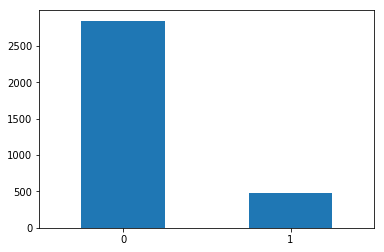

In [19]:
check_balance(data,label='Churn')

0    85.508551
1    14.491449
Name: Churn, dtype: float64 

0    2850
1     483
Name: Churn, dtype: int64


()

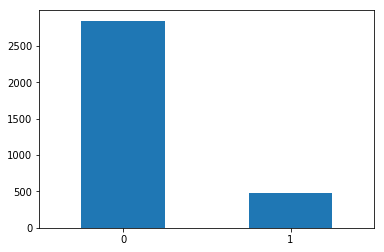

In [20]:
check_balance(data_cat,label='Churn')

# Initial Logistic Fit with statsmodel

statsmodel with formula takes the y and X in form y_column ~ + x1 + x2 + x3 .... I decide to make this more programmatic and crete variable for it.


In [21]:

# Column Names for both y and X are recoreded in a list.

data_vars_org = data.columns.values.tolist()
y_org =['Churn']
X_org =[i for i in data_vars_org if i not in y_org]

data_vars = data_cat.columns.values.tolist()
y =['Churn']
X =[i for i in data_vars if i not in y]




In [22]:
data_cat_2 = data_cat.drop(['AK'], axis=1)
data_vars_2 = data_cat_2.columns.values.tolist()
y_2 =['Churn']
X_2 =[i for i in data_vars_2 if i not in y_2]


In [23]:
#Uncomment to Double-Check

#data_vars
#y
#X



In [24]:
#Uncomment to Double-Check

#data_vars_org
#y_org
#X_org

In [25]:
#function to create a string as variable for statsmodel, based on y and X lists

def create_string(y_in, X_in):
    u = 0
    string =  y_in[0] + '~'

    for i in X_in:
        if (u == 0):
            string += ' '
            string += i
            u += 1
        else:
            string += ' + '
            string += i
            
    return(string)

I will do 3 statsmodels, one without states (stats_string_org) another one with all states with a column and one with a one-hot encoded, where the first state is dropped ...this matches the way stats-model would treat a categorical value.

In [26]:
stats_string = create_string(y,X)
stats_string_org = create_string(y_org, X_org)
stats_string_2 = create_string(y_2, X_2) 

In [27]:
stats_string_org

'Churn~ State + Account_Length + Area_Code + Intl_Plan + VMail_Plan + VMail_Message + Day_Mins + Day_Calls + Day_Charge + Eve_Mins + Eve_Calls + Eve_Charge + Night_Mins + Night_Calls + Night_Charge + Intl_Mins + Intl_Calls + Intl_Charge + CustServ_Calls'

In [28]:
stats_string

'Churn~ Account_Length + Area_Code + Intl_Plan + VMail_Plan + VMail_Message + Day_Mins + Day_Calls + Day_Charge + Eve_Mins + Eve_Calls + Eve_Charge + Night_Mins + Night_Calls + Night_Charge + Intl_Mins + Intl_Calls + Intl_Charge + CustServ_Calls + AK + AL + AR + AZ + CA + CO + CT + DC + DE + FL + GA + HI + IA + ID + IL + IN + KS + KY + LA + MA + MD + ME + MI + MN + MO + MS + MT + NC + ND + NE + NH + NJ + NM + NV + NY + OH + OK + OR + PA + RI + SC + SD + TN + TX + UT + VA + VT + WA + WI + WV + WY'

In [29]:
stats_string_2

'Churn~ Account_Length + Area_Code + Intl_Plan + VMail_Plan + VMail_Message + Day_Mins + Day_Calls + Day_Charge + Eve_Mins + Eve_Calls + Eve_Charge + Night_Mins + Night_Calls + Night_Charge + Intl_Mins + Intl_Calls + Intl_Charge + CustServ_Calls + AL + AR + AZ + CA + CO + CT + DC + DE + FL + GA + HI + IA + ID + IL + IN + KS + KY + LA + MA + MD + ME + MI + MN + MO + MS + MT + NC + ND + NE + NH + NJ + NM + NV + NY + OH + OK + OR + PA + RI + SC + SD + TN + TX + UT + VA + VT + WA + WI + WV + WY'

Run a logistic regression with statsmodel



In [30]:

import statsmodels.formula.api as sm 


In [31]:
model= sm.logit(formula=stats_string_org, data= data).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.310694
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           68
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.2491
Time:                        19:43:13   Log-Likelihood:                -1035.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                3.710e-103
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -9.5082      1.152     -8.257      0.000     -11.765      -7.251
State[T.AL]        0.3470      0.763      0.455      0.649      -1.149       1.843
State[T.AR]        0.9122      0.753      1.212      0.226      -0.563       2.388
State[T.AZ]        0.0980      0.846      0.116      0.908      -1.559       1.755
State[T.CA]        1.8167      0.783      2.321      0.020       0.282       3.351
State[T.CO]        0.6560      0.763      0.860      0.390      -0.839       2.151
State[T.CT]        1.0246      0.726      1.412      0.158      -0.398       2.447
State[T.DC]        0.6895      0.809      0.853      0.394      -0.896       2.275
State[T.DE]        0.7479      0.750      0.997      0.319      -0.722       2.217
State[T.FL]        0.5954      0.762      0.782      0.434      -0.897       2.088
State[T.GA]        0.6678      0.779      0.858      0.391      -0.858       2.194
State[T.HI]       -0.2226      0.896     -0.248      0.804      -1.979       1.534
State[T.IA]        0.2142      0.903      0.237      0.812      -1.555       1.983
State[T.ID]        0.8663      0.748      1.158      0.247      -0.600       2.333
State[T.IL]       -0.2299      0.834     -0.276      0.783      -1.865       1.405
State[T.IN]        0.4455      0.753      0.592      0.554      -1.031       1.922
State[T.KS]        1.0629      0.730      1.456      0.145      -0.368       2.494
State[T.KY]        0.7880      0.767      1.028      0.304      -0.715       2.291
State[T.LA]        0.5560      0.836      0.665      0.506      -1.083       2.195
State[T.MA]        1.1709      0.743      1.575      0.115      -0.286       2.628
State[T.MD]        1.1482      0.717      1.601      0.109      -0.258       2.554
State[T.ME]        1.3337      0.729      1.830      0.067      -0.095       2.762
State[T.MI]        1.3929      0.714      1.950      0.051      -0.007       2.793
State[T.MN]        1.1621      0.716      1.624      0.104      -0.240       2.565
State[T.MO]        0.5926      0.775      0.765      0.444      -0.926       2.112
State[T.MS]        1.3580      0.728      1.864      0.062      -0.070       2.786
State[T.MT]        1.8684      0.717      2.605      0.009       0.463       3.274
State[T.NC]        0.5890      0.755      0.780      0.435      -0.891       2.069
State[T.ND]        0.1404      0.797      0.176      0.860      -1.421       1.702
State[T.NE]        0.2970      0.806      0.368      0.713      -1.283       1.877
State[T.NH]        1.1766      0.769      1.530      0.126      -0.331       2.684
State[T.NJ]        1.5766      0.710      2.220      0.026       0.184       2.969
State[T.NM]        0.4592      0.788      0.583      0.560      -1.085       2.003
State[T.NV]        1.2506      0.725      1.724      0.085      -0.171       2.672
State[T.NY]        1.1597      0.720      1.611      0.107      -0.251       2.571
State[T.OH]        0.6782      0.747      0.908      0.364      -0.786       2.142
Stat

In [32]:
model= sm.logit(formula=stats_string, data= data_cat).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.310694
         Iterations 8


/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           68
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.2491
Time:                        19:43:13   Log-Likelihood:                -1035.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                3.710e-103
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.5790        nan        nan        nan         nan         nan
Account_Length     0.0010      0.001      0.687      0.492      -0.002       0.004
Area_Code         -0.0005      0.001     -0.399      0.690      -0.003       0.002
Intl_Plan          2.1920      0.153     14.296      0.000       1.891       2.492
VMail_Plan        -2.1321      0.594     -3.587      0.000      -3.297      -0.967
VMail_Message      0.0383      0.019      2.053      0.040       0.002       0.075
Day_Mins          -0.3811      3.380     -0.113      0.910      -7.006       6.243
Day_Calls          0.0040      0.003      1.412      0.158      -0.002       0.010
Day_Charge         2.3185     19.882      0.117      0.907     -36.650      41.287
Eve_Mins           0.8983      1.700      0.529      0.597      -2.433       4.230
Eve_Calls          0.0010      0.003      0.343      0.731      -0.005       0.007
Eve_Charge       -10.4771     19.997     -0.524      0.600     -49.670      28.716
Night_Mins        -0.2291      0.904     -0.253      0.800      -2.002       1.544
Night_Calls        0.0001      0.003      0.051      0.960      -0.006       0.006
Night_Charge       5.1779     20.098      0.258      0.797     -34.214      44.570
Intl_Mins         -4.1611      5.494     -0.757      0.449     -14.929       6.607
Intl_Calls        -0.0910      0.026     -3.533      0.000      -0.141      -0.041
Intl_Charge       15.7198     20.347      0.773      0.440     -24.160      55.599
CustServ_Calls     0.5363      0.041     13.087      0.000       0.456       0.617
AK                -0.9293        nan        nan        nan         nan         nan
AL                -0.5822        nan        nan        nan         nan         nan
AR                -0.0171        nan        nan        nan         nan         nan
AZ                -0.8313        nan        nan        nan         nan         nan
CA                 0.8875        nan        nan        nan         nan         nan
CO                -0.2733        nan        nan        nan         nan         nan
CT                 0.0953        nan        nan        nan         nan         nan
DC                -0.2397        nan        nan        nan         nan         nan
DE                -0.1814        nan        nan        nan         nan         nan
FL                -0.3338        nan        nan        nan         nan         nan
GA                -0.2614        nan        nan        nan         nan         nan
HI                -1.1519        nan        nan        nan         nan         nan
IA                -0.7150        nan        nan        nan         nan         nan
ID                -0.0629        nan        nan        nan         nan         nan
IL                -1.1591        nan        nan        nan         nan         nan
IN                -0.4837        nan        nan        nan         nan         nan
KS                 0.1336        nan        nan        nan         nan         nan
KY  

In [33]:
model= sm.logit(formula=stats_string_2, data= data_cat_2).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.310694
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3264
Method:                           MLE   Df Model:                           68
Date:                Sun, 24 May 2020   Pseudo R-squ.:                  0.2491
Time:                        19:43:14   Log-Likelihood:                -1035.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                3.710e-103
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -9.5082      1.152     -8.257      0.000     -11.765      -7.251
Account_Length     0.0010      0.001      0.687      0.492      -0.002       0.004
Area_Code         -0.0005      0.001     -0.399      0.690      -0.003       0.002
Intl_Plan          2.1920      0.153     14.296      0.000       1.891       2.492
VMail_Plan        -2.1321      0.594     -3.587      0.000      -3.297      -0.967
VMail_Message      0.0383      0.019      2.053      0.040       0.002       0.075
Day_Mins          -0.3811      3.380     -0.113      0.910      -7.006       6.243
Day_Calls          0.0040      0.003      1.412      0.158      -0.002       0.010
Day_Charge         2.3185     19.882      0.117      0.907     -36.650      41.287
Eve_Mins           0.8983      1.700      0.529      0.597      -2.433       4.230
Eve_Calls          0.0010      0.003      0.343      0.731      -0.005       0.007
Eve_Charge       -10.4771     19.997     -0.524      0.600     -49.670      28.716
Night_Mins        -0.2291      0.904     -0.253      0.800      -2.002       1.544
Night_Calls        0.0001      0.003      0.051      0.960      -0.006       0.006
Night_Charge       5.1779     20.098      0.258      0.797     -34.214      44.570
Intl_Mins         -4.1611      5.494     -0.757      0.449     -14.929       6.607
Intl_Calls        -0.0910      0.026     -3.533      0.000      -0.141      -0.041
Intl_Charge       15.7198     20.347      0.773      0.440     -24.160      55.599
CustServ_Calls     0.5363      0.041     13.087      0.000       0.456       0.617
AL                 0.3470      0.763      0.455      0.649      -1.149       1.843
AR                 0.9122      0.753      1.212      0.226      -0.563       2.388
AZ                 0.0980      0.846      0.116      0.908      -1.559       1.755
CA                 1.8167      0.783      2.321      0.020       0.282       3.351
CO                 0.6560      0.763      0.860      0.390      -0.839       2.151
CT                 1.0246      0.726      1.412      0.158      -0.398       2.447
DC                 0.6895      0.809      0.853      0.394      -0.896       2.275
DE                 0.7479      0.750      0.997      0.319      -0.722       2.217
FL                 0.5954      0.762      0.782      0.434      -0.897       2.088
GA                 0.6678      0.779      0.858      0.391      -0.858       2.194
HI                -0.2226      0.896     -0.248      0.804      -1.979       1.534
IA                 0.2142      0.903      0.237      0.812      -1.555       1.983
ID                 0.8663      0.748      1.158      0.247      -0.600       2.333
IL                -0.2299      0.834     -0.276      0.783      -1.865       1.405
IN                 0.4455      0.753      0.592      0.554      -1.031       1.922
KS                 1.0629      0.730      1.456      0.145      -0.368       2.494
KY                 0.7880      0.767      1.028      0.304      -0.715       2.291
LA  

In [34]:
def accuracy_scores(conf_array):
    True_N = conf_array[0,0]
    False_N = conf_array[0,1]
    True_P = conf_array[1,1]
    False_P = conf_array[1,0]
    Real_P = np.sum(conf_array[:,1])
    Real_N = np.sum(conf_array[:,0])
    total = np.sum(conf_array)
    miss_rate = 100*((False_N +False_P)/total)
    accuracy = 100*((True_N + True_P)/total)
    recall = 100 * True_P / Real_P
    precision = 100 * True_N / Real_N
    print('Missclassification Rate is', miss_rate)
    print('Accuracy is', accuracy)
    print('Sensitivity (T_p/Act_p) is', recall)
    print('Specifity (T_n/Act_n) is', precision)
    return(miss_rate, accuracy)

In [35]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df

,0_Predicted,1_Predicted
0,2763.0,87.0
1,358.0,125.0


In [36]:
accuracy_scores(confusion)

Missclassification Rate is 13.35133513351335
Accuracy is 86.64866486648664
Sensitivity (T_p/Act_p) is 58.9622641509434
Specifity (T_n/Act_n) is 88.52931752643383


(13.35133513351335, 86.64866486648664)

# Initial Outcome here 

statsmodel by default takes care of the one-hot encoded values. I will use the data_cat_2 to mimic te same in sklearn log regression

# Initial match witk sklearn

In [37]:
relevant = data_cat_2.columns.tolist()
#relevant

In [38]:
def create_relevant_Features(in_list, eliminate_list):
    new_list = []
    for i in in_list:
        if i in eliminate_list:
            continue
        else:
            new_list.append(i)
    return(new_list)

In [39]:
predictor = 'Churn'
to_eliminate = []
to_eliminate.append(predictor)

In [40]:
relevant_X = create_relevant_Features(relevant, to_eliminate)
X_Train = data_cat_2[relevant_X]
y_train = data_cat_2[predictor]

In [41]:
#Uncomment to double-check

#X_Train
#y_train

Now with the sklearn

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [43]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train, y_train.values.ravel())

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 9.36141747e-04 -7.14771157e-04  2.17899626e+00 -2.38808643e+00
   4.59682825e-02  1.23174264e-02  4.16723005e-03  4.80637489e-03
   1.05068063e-02  1.01424735e-03 -3.16361185e-02  3.33155302e-03
   1.80206838e-04  1.36805388e-02  6.35180191e-02 -8.97598080e-02
   7.28508823e-02  5.38409434e-01 -5.20221959e-01  5.05026762e-02
  -8.31463722e-01  1.01794521e+00 -1.75462427e-01  1.63422121e-01
  -1.56297721e-01 -9.85825435e-02 -2.62195264e-01 -1.61909425e-01
  -1.22856141e+00 -6.85273136e-01  3.44182207e-02 -1.15246102e+00
  -4.22444792e-01  2.19224647e-01 -4.31657530e-02 -3.10161619e-01
   3.24103462e-01  2.88182679e-01  5.06918765e-01  5.47897024e-01
   3.27175195e-01 -2.57081660e-01  5.20158643e-01  1.04126670e+00
  -2.61837082e-01 -7.30857403e-01 -5.41807126e-01  3.45883855e-01
   7.76013096e-01 -3.79629636e-01  4.00466253e-01  3.11836942e-01
  -1.74925723e-01  2.83830760e-02 -7.99876981e-02  3.11866206e-01
  -9.92540628e-01  9.34172653e-01 -2.44404984e-02 -6.24462629e-01
   8.40529

# Confusion Matrix and ROC

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [46]:
y_hat = logreg.predict(X_Train)
confusion_table = confusion_matrix(y_train, y_hat)
print(confusion_table)

[[2760   90]
 [ 353  130]]


In [47]:
accuracy_scores(confusion_table)

Missclassification Rate is 13.29132913291329
Accuracy is 86.70867086708671
Sensitivity (T_p/Act_p) is 59.09090909090909
Specifity (T_n/Act_n) is 88.66045615162223


(13.29132913291329, 86.70867086708671)

In [48]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2850
           1       0.59      0.27      0.37       483

    accuracy                           0.87      3333
   macro avg       0.74      0.62      0.65      3333
weighted avg       0.84      0.87      0.85      3333



Area under the Curve 0.8373854927173006


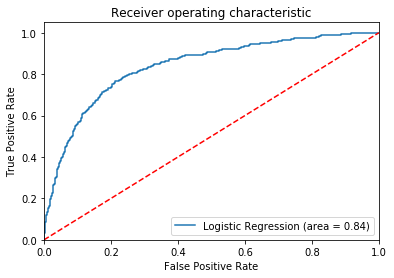

In [49]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_Train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_Train)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion of this first ROC

Not really useful, to calculate the ROC on the same data as we trained the model. Will need to split test/train data to become more meaningful

# Split Train / Test Data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
relevant_X = create_relevant_Features(relevant, to_eliminate)
X = data_cat_2[relevant_X]
y = data_cat_2[predictor]

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [52]:
#Uncomment to double-check

#X_Test
#y_test

In [53]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train, y_train.values.ravel())

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_hat = logreg.predict(X_Train)
confusion_table = confusion_matrix(y_train, y_hat)
print(confusion_table)

[[1934   59]
 [ 240  100]]


In [55]:
y_hat = logreg.predict(X_Test)
confusion_table = confusion_matrix(y_test, y_hat)
print(confusion_table)

[[816  41]
 [106  37]]


In [56]:
y_hat = logreg.predict(X_Test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       857
           1       0.47      0.26      0.33       143

    accuracy                           0.85      1000
   macro avg       0.68      0.61      0.63      1000
weighted avg       0.83      0.85      0.83      1000



Area under the Curve 0.7857545022072443


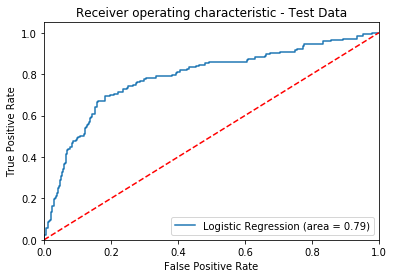

In [57]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Makes sense that we dropped ROC score a bit.

# Feature Selection

We had the statsmodel with the p-values, we will use this to further tune feature selection

In [58]:
model.pvalues

Intercept         1.498712e-16
Account_Length    4.919466e-01
Area_Code         6.900881e-01
Intl_Plan         2.328101e-46
VMail_Plan        3.351249e-04
                      ...     
VT                9.097279e-01
WA                5.129107e-02
WI                7.131762e-01
WV                4.344908e-01
WY                6.992279e-01
Length: 69, dtype: float64

In [59]:
#Feature Reduction according to a threshold P-selector to select only values smaller or equal than p-selector

def feature_reduction(in_model, P_selector):
    
    newlist = list(in_model[in_model['P>|z|']<=P_selector].index)[1:] 
    return(newlist)
    

In [60]:
def prepare_X_y_red(selector_list, X_Train_in, X_Test_in):
    
    X_Train_new = X_Train_in[selector_list]
    X_Test_new = X_Test_in[selector_list]

    return(X_Train_new, X_Test_new)

In [61]:
def f1_score(confusion_in):
    True_N = confusion_in[0,0]
    False_N = confusion_in[0,1]
    True_P = confusion_in[1,1]
    False_P = confusion_in[1,0]

    prec_ision = True_P / (True_P + False_P)
    re_call = True_P / (True_P + False_N)
    f1 = (2* prec_ision * re_call / (prec_ision + re_call))
    
    return(f1)

# Apply it now to select features

I commented this ection out, as I did feature selection on all data in statsmodel. Please jump to the next section

In [78]:
"""

model.pvalues
model_red = model
#LRresult = (model.summary2().tables[1])

my_threshold = 1
threshold_countdown = 0.01
best_f1 = 0

while (my_threshold > 0.05):
    #print('p-Threshold: ', my_threshold)
    LRresult = (model_red.summary2().tables[1])
    new_relevant = feature_reduction(LRresult, my_threshold)
    stats_string_red = create_string([predictor], new_relevant)
    model_red = sm.logit(formula=stats_string_red, data= data_cat_2).fit()
    X_Train5, X_Test5,= prepare_X_y_red(new_relevant, X_Train, X_Test)
    #print('do sklearn')
    logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
    logreg.fit(X_Train5, y_train.values.ravel())
    y_hat = logreg.predict(X_Test5)
    confusion_table = confusion_matrix(y_test, y_hat)
    f1 = f1_score(confusion_table)
    #print(f1)
    best_f1 = max(f1, best_f1)
    if (f1 == best_f1):
        best_relevant = new_relevant
        best_threshold = my_threshold
    print('f1 = ', f1)
    my_threshold = my_threshold - threshold_countdown
    
    
    
print('best f1: ', best_f1)
print('best Threshold: ', best_threshold)
print('best relevant: ', best_relevant)

    
LRresult = (model.summary2().tables[1])
all_features = feature_reduction(LRresult, 1)
len(all_features)
len(best_relevant)

for i in all_features:
    if i in best_relevant:
        continue
    else:
        print('improved by elimination of: ', i) 
    
""" 

"\n\nmodel.pvalues\nmodel_red = model\n#LRresult = (model.summary2().tables[1])\n\nmy_threshold = 1\nthreshold_countdown = 0.01\nbest_f1 = 0\n\nwhile (my_threshold > 0.05):\n    #print('p-Threshold: ', my_threshold)\n    LRresult = (model_red.summary2().tables[1])\n    new_relevant = feature_reduction(LRresult, my_threshold)\n    stats_string_red = create_string([predictor], new_relevant)\n    model_red = sm.logit(formula=stats_string_red, data= data_cat_2).fit()\n    X_Train5, X_Test5,= prepare_X_y_red(new_relevant, X_Train, X_Test)\n    #print('do sklearn')\n    logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')\n    logreg.fit(X_Train5, y_train.values.ravel())\n    y_hat = logreg.predict(X_Test5)\n    confusion_table = confusion_matrix(y_test, y_hat)\n    f1 = f1_score(confusion_table)\n    #print(f1)\n    best_f1 = max(f1, best_f1)\n    if (f1 == best_f1):\n        best_relevant = new_relevant\n        best_threshold = my_threshold\n    print('f1 = ', f1)\n    my_thr

In [79]:
"""
LRresult = (model.summary2().tables[1])
all_features = feature_reduction(LRresult, 1)
len(all_features)
len(best_relevant)

for i in all_features:
    if i in best_relevant:
        continue
    else:
        print('to reach best, eliminate: ', i)
"""


"\nLRresult = (model.summary2().tables[1])\nall_features = feature_reduction(LRresult, 1)\nlen(all_features)\nlen(best_relevant)\n\nfor i in all_features:\n    if i in best_relevant:\n        continue\n    else:\n        print('to reach best, eliminate: ', i)\n"

Check Results of this reduction

In [80]:
#X_Train5, X_Test5,= prepare_X_y_red(best_relevant, X_Train, X_Test)

In [82]:
"""
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train5, y_train.values.ravel())
y_hat = logreg.predict(X_Test5)
confusion_table = confusion_matrix(y_test, y_hat)
print(confusion_table)
"""

"\nlogreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')\nlogreg.fit(X_Train5, y_train.values.ravel())\ny_hat = logreg.predict(X_Test5)\nconfusion_table = confusion_matrix(y_test, y_hat)\nprint(confusion_table)\n"

In [83]:
#print(classification_report(y_test, y_hat))

In [84]:
"""
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test5))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test5)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
"""

'\nlogit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test5))\nfpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test5)[:,1])\nprint(\'Area under the Curve\', auc(fpr,tpr))\nplt.figure()\n#Seems that the roc_auc_score is a bit off when not normal distributed\n#plt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % auc(fpr,tpr))\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic - Test Data\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()\n'

# Statsmodel on train set only

We tuned the statsmodel on the full data, but it should be the same Train/Test Split .. so we correct this

In [69]:
X_Train_statMod = X_Train
X_Train_statMod['Churn'] = y_train

model.pvalues
model_red = model
#LRresult = (model.summary2().tables[1])

stats_mod_Train = X_Train
my_threshold = 1
threshold_countdown = 0.01
best_f1 = 0

while (my_threshold > 0.05):
    #print('p-Threshold: ', my_threshold)
    LRresult = (model_red.summary2().tables[1])
    new_relevant = feature_reduction(LRresult, my_threshold)
    stats_string_red = create_string([predictor], new_relevant)
    model_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()
    X_Train5, X_Test5,= prepare_X_y_red(new_relevant, X_Train, X_Test)
    #print('do sklearn')
    logreg = LogisticRegression(C=1e8, max_iter=10000, solver='lbfgs')
    logreg.fit(X_Train5, y_train.values.ravel())
    y_hat = logreg.predict(X_Test5)
    confusion_table = confusion_matrix(y_test, y_hat)
    f1 = f1_score(confusion_table)
    print(f1)
    best_f1 = max(f1, best_f1)
    if (f1 == best_f1):
        best_relevant = new_relevant
        best_threshold = my_threshold
    #print('f1 = ', f1)
    my_threshold = my_threshold - threshold_countdown
    
    
    
print('best f1: ', best_f1)
print('best Threshold: ', best_threshold)
print('best relevant: ', best_relevant)

    
LRresult = (model.summary2().tables[1])
all_features = feature_reduction(LRresult, 1)
len(all_features)
len(best_relevant)


    
    

/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.33484162895927605
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.33484162895927605
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated successfully.
         Current function value: 0.302076
         Iterations 8
0.3423423423423423
Optimization terminated succes

0.2564102564102564
Optimization terminated successfully.
         Current function value: 0.326998
         Iterations 7
0.25510204081632654
Optimization terminated successfully.
         Current function value: 0.327519
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327519
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327519
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327949
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327949
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327949
         Iterations 7
0.2653061224489796
Optimization terminated successfully.
         Current function value: 0.327949
         Iterations 7
0.2653061224489796
Optimization

64

In [70]:
#print Features, we removed


removed_features = []
for i in all_features:
    if i in best_relevant:
        continue
    else:
        removed_features.append(i) 
        
print('improved by elimination of: ', removed_features) 

improved by elimination of:  ['Account_Length', 'Eve_Calls', 'NE', 'VA']


In [71]:
#This was just to review the model with all features, but not needed at this point

"""
model.pvalues
model_red = model

stats_mod_Train = X_Train
my_threshold = 1
threshold_countdown = 0.02
best_f1 = 0


LRresult = (model_red.summary2().tables[1])
new_relevant = feature_reduction(LRresult, my_threshold)
stats_string_red = create_string([predictor], new_relevant)
model_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()

model_red.summary2()
"""

'\nmodel.pvalues\nmodel_red = model\n\nstats_mod_Train = X_Train\nmy_threshold = 1\nthreshold_countdown = 0.02\nbest_f1 = 0\n\n\nLRresult = (model_red.summary2().tables[1])\nnew_relevant = feature_reduction(LRresult, my_threshold)\nstats_string_red = create_string([predictor], new_relevant)\nmodel_red = sm.logit(formula=stats_string_red, data= X_Train_statMod).fit()\n\nmodel_red.summary2()\n'

In [72]:
X_Train5, X_Test5,= prepare_X_y_red(best_relevant, X_Train, X_Test)

In [73]:
logreg = LogisticRegression(C=1e8, max_iter=5000, solver='lbfgs')
logreg.fit(X_Train5, y_train.values.ravel())
y_hat = logreg.predict(X_Test5)
confusion_table = confusion_matrix(y_test, y_hat)
print(confusion_table)

[[813  44]
 [102  41]]


/Users/tkramer/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [74]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       857
           1       0.48      0.29      0.36       143

    accuracy                           0.85      1000
   macro avg       0.69      0.62      0.64      1000
weighted avg       0.83      0.85      0.84      1000



Area under the Curve 0.7870192817684066


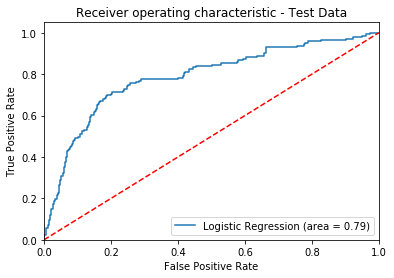

In [75]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_Test5))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_Test5)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Test Data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion 

We reduced quite a lo of features in the excercise, when splitting test/train set. Results are not always reproducable as split seems to work a bit random. And hence results vary in a way.

In [76]:
len(best_relevant)

64

In [77]:
best_relevant

['Area_Code',
 'Intl_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'Intl_Mins',
 'Intl_Calls',
 'Intl_Charge',
 'CustServ_Calls',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']